<a href="https://colab.research.google.com/github/hannahsophieMWB/machine_learning_MiT/blob/main/Learner_Notebook_Potential_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Libraries for data manipulation and visualization
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report,f1_score

from sklearn import metrics

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [2]:
# mount GDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read the healthcare dataset file
data = pd.read_csv("/content/drive/MyDrive/AI and Machine Learning/machine_learning_MiT/MiT Course/Elective Projects/Machine Learning/Potential Customers Dataset.csv")

## Data Overview

- Observations
- Sanity checks

In [4]:
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

Observations:



*   There are 4612 observations and 15 columns in the data.

*   All the column have 4612 non-null values, i.e., there are no missing values in the data.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

In [6]:
#  Dropping the columns we do not need for the analysis
df = data.drop('ID', axis = 1)

## We drop ID as it is just an identifier we do not want to have it in the future model
## we relabel to df to not alter the original data




In [7]:
# Creating numerical columns
num_cols = ['age','website_visits', 'time_spent_on_website', 'page_views_per_visit']

# Creating categorical variables

cat_cols = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels',  'referral' ] # we exclude the status = target column

In [8]:
#  Checking summary statistics
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434


In [9]:
# Univariate Analysis for numerical values

# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize=(10, 5), kde=False, bins=None):

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   # Add median to the histogram

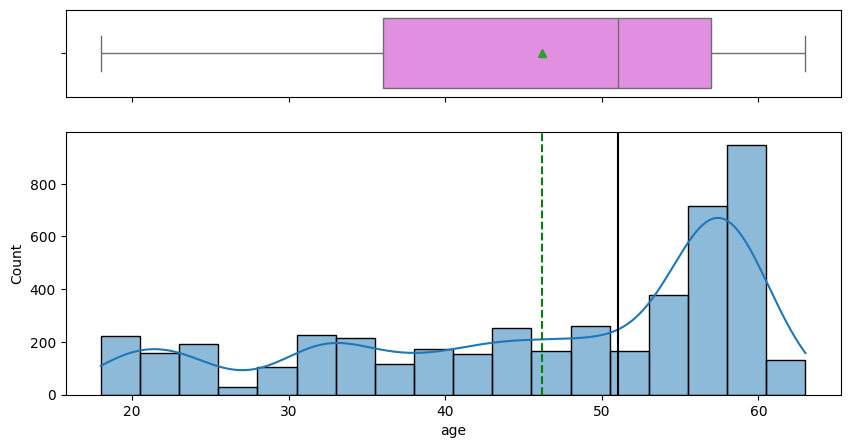

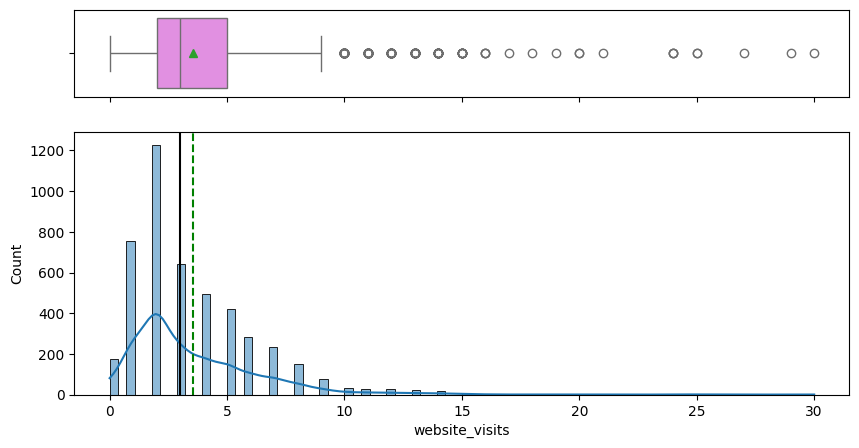

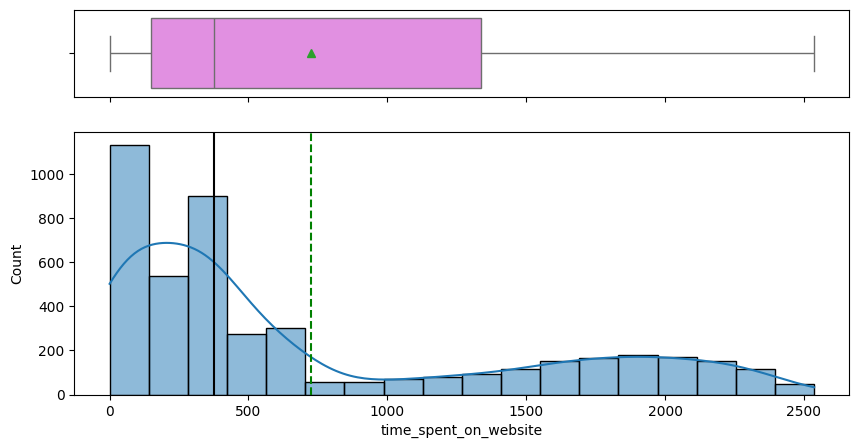

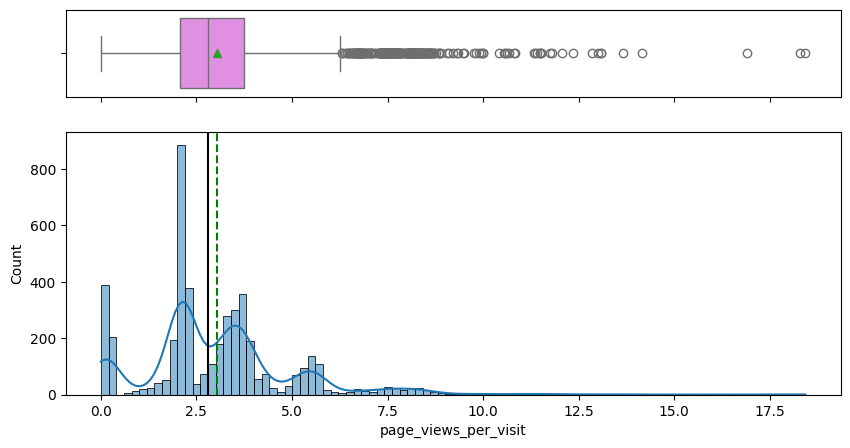

In [10]:
# Loop through each numerical column and apply the function
for col in num_cols:
    histogram_boxplot(df, col, kde=True)

Observations:


*   Age has a left tailed distribution whish shows that on average, people over 46 years tend to take the upskilling courses. This might be because they are professionals with the required buying power to invest in their learning.

*   Website visits has a peak of 2-3 visits with very few people visiting the website more than 5 times. Since there are a few outliers, we could treat these later on.

*   Time spent on the website is mostly between 0-100 seconds with a median of ∼450 seconds and very few people spending more than 500 seconds on the page. This might indicate that there is room for SEO optimization

* Page views per visit has a uniform distribution with an average of ∼3 pages visited. Since very few customer visit the page more than 3.7 times, we can later allocate the remaining page visitors to this number to avoid outliers.






Observations:



*   Average age is 56 years. It has a high range from 18 years to 63 years.
*   Number of Website visits is on average 3.5 with a range from 0 - 30.
*   Time spent on Website is on average 724 (seconds) with a range from 0 - 42.28 minutes.
*   Page views per visit are on average 3 with a minumum of 0 and a maximum of 18.





<Axes: >

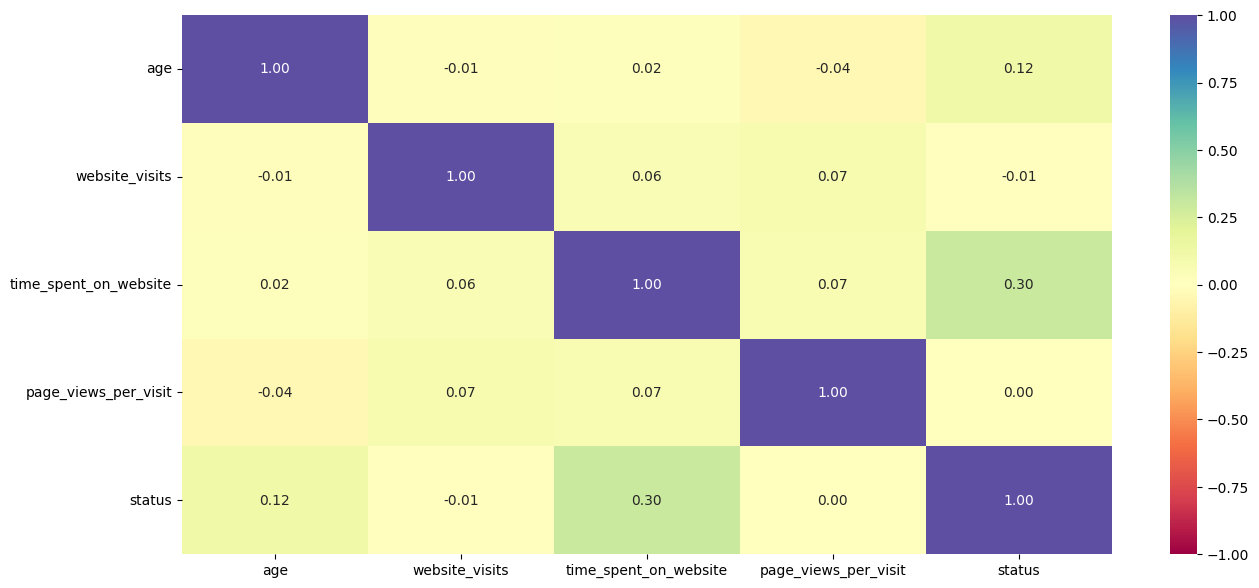

In [11]:
# Bivariate Analysis

# Finding the correlation between various columns of the dataset
plt.figure(figsize = (15,7))
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral")

Observations:



*   The heatmap shows that there is almost no correlation between variables other than a very weak one between time spent on website and the target variable status (0.3)

*   The continuous variables show no correlation with the target variable (Stay (in days)), which indicates that the categorical variables might be more important for the prediction.

In [12]:
# Univariate analysis for cateogrical values
for i in cat_cols:
    print(df[i].value_counts(normalize = True))

    print('*' * 40)


Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: current_occupation, dtype: float64
****************************************
Website       0.551171
Mobile App    0.448829
Name: first_interaction, dtype: float64
****************************************
High      0.490893
Medium    0.485906
Low       0.023200
Name: profile_completed, dtype: float64
****************************************
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: last_activity, dtype: float64
****************************************
No     0.892238
Yes    0.107762
Name: print_media_type1, dtype: float64
****************************************
No     0.94948
Yes    0.05052
Name: print_media_type2, dtype: float64
****************************************
No     0.885733
Yes    0.114267
Name: digital_media, dtype: float64
****************************************
No     0.847138
Yes    0.152862
Name: educational_channels, dtype: float64
******

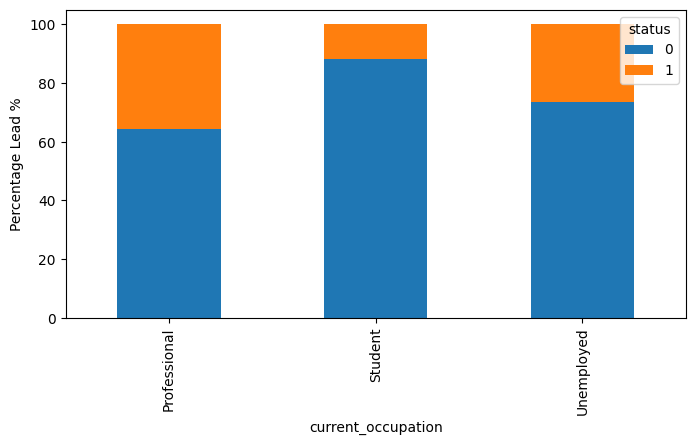

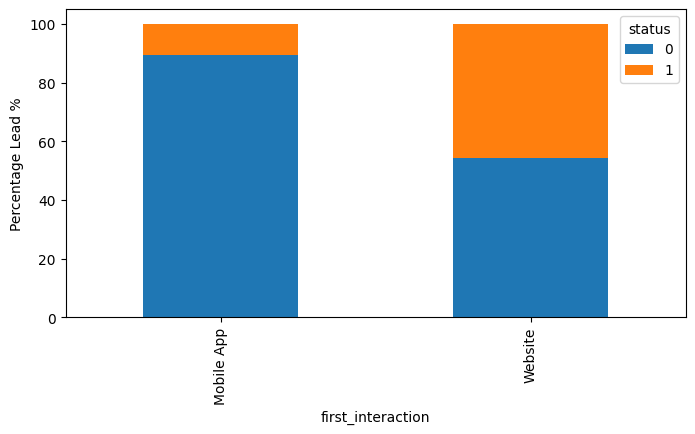

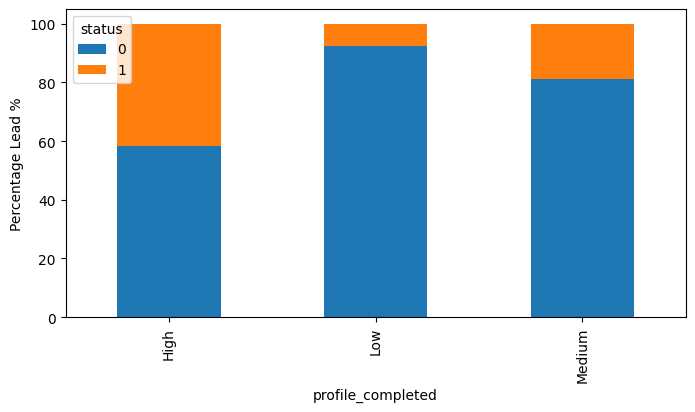

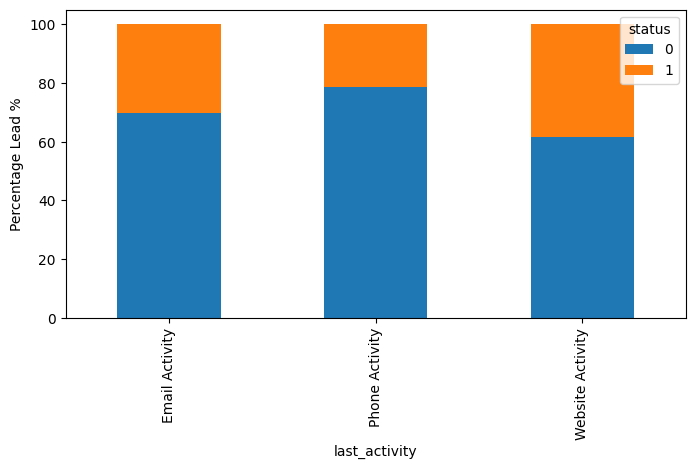

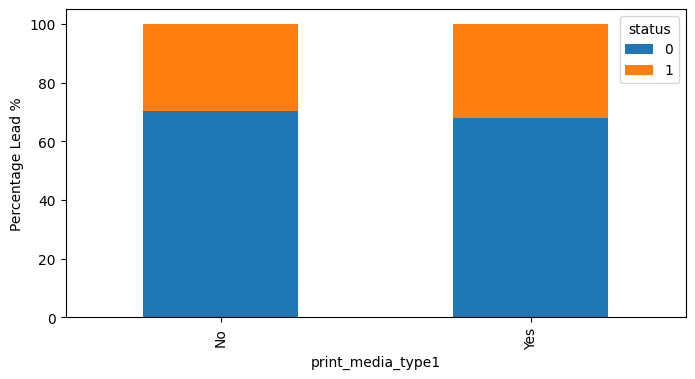

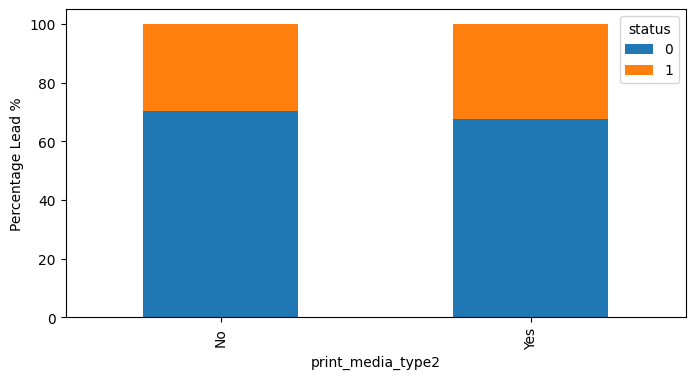

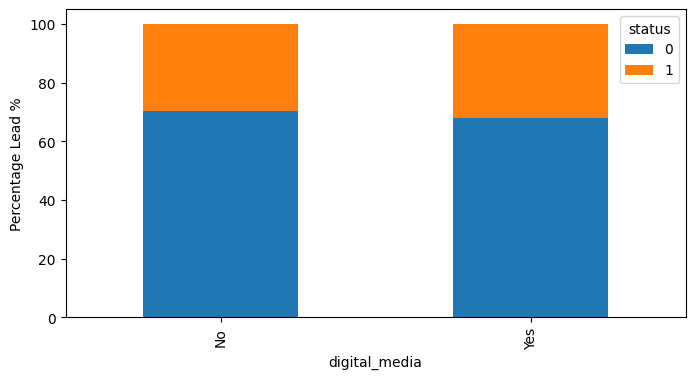

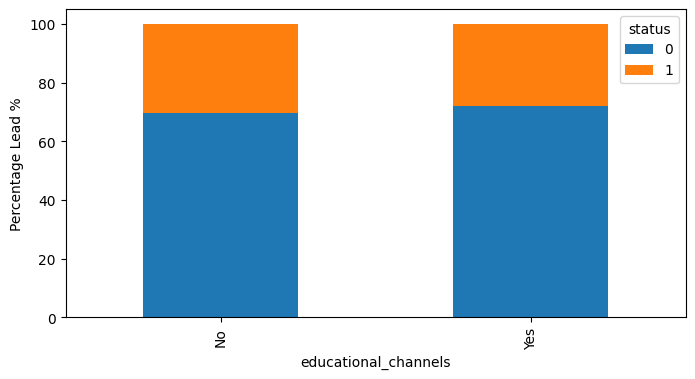

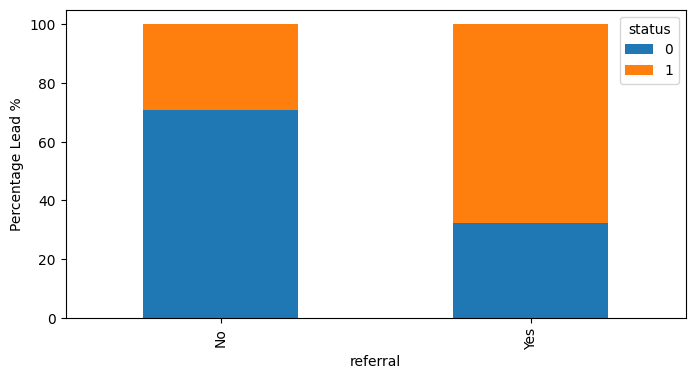

In [13]:
# *We have analyzed different categorical and numerical variables. Let's now check how lead status is related with other categorical variables**
for i in cat_cols:
    if i != 'status':
        (pd.crosstab(df[i], df['status'], normalize = 'index')*100).plot(kind = 'bar', figsize = (8, 4), stacked = True)
        plt.ylabel('Percentage Lead %')



Obersvations

1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.

*   Professionals have a much higher (∼ 40%) lead than students (∼ 10%) or unemployed (∼ 25%).
*   That indicates that professionals with a job and buying power seam to  get more out of the course than students and unemployed.


2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?

*   The first interaction has a massive impact as first contacts via website have a much higher lead percentage (∼ 50%) compared to mobile app visitors (∼ 10%).


3. The company uses multiple modes to interact with prospects. Which way of interaction works best?

*   High intercation has the highest lead likelihood (∼ 40%) compared to mobile Medium (∼ 20%) and Low  (∼ 10%).

4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?

*   Referrals have the highest lead conversation rate (∼ 65%). For the other channels such as print or digital media, the conversation rate are lower but similar (∼ 25%).

5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

*   Referrals have the highest lead conversation rate (∼ 65%). For the other channels such as print or digital media, the conversation rate are lower but similar (between ∼5% to ∼11%).


## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [14]:
# Outlier treatment
## Website visits

# Reassign website_visits greater than 5 to 5 given these fall within the IQR (below 75% of distribution)
df.loc[data['website_visits'] > 5, 'website_visits'] = 5

# Verify the modification by checking the unique values of website_visits
unique_website_visits_after_treatment = df['website_visits'].unique()

unique_website_visits_after_treatment

array([5, 2, 3, 4, 1, 0])

In [15]:
## Page views per visit

# Reassign page_views_per_visit that are more than 75% of the distribution to 4
df.loc[df['page_views_per_visit'] > 3.7, 'page_views_per_visit'] = 3.7

# Verify the modification by checking the unique values of website_visits
unique_page_views_after = df['page_views_per_visit'].unique()

unique_page_views_after

array([1.861, 0.32 , 0.074, ..., 2.035, 1.179, 2.692])

In [16]:
df.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,5,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,3.700,Email Activity,No,No,No,No,No,0


In [17]:
# Featur eengineering

# Create dummy variables for the categorical columns and drop the first category
data_with_dummies = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Display the first few rows to confirm
data_with_dummies.head()



,age,website_visits,time_spent_on_website,page_views_per_visit,status,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
0,57,5,1639,1.861,1,0,1,1,0,0,0,1,1,0,1,0,0
1,56,2,83,0.320,0,0,0,0,0,1,0,1,0,0,0,1,0
2,52,3,330,0.074,0,0,0,1,0,1,0,1,0,0,1,0,0
3,53,4,464,2.057,1,0,1,1,0,0,0,1,0,0,0,0,0
4,23,4,600,3.700,0,1,0,1,0,0,0,0,0,0,0,0,0


In [18]:
data_new = data_with_dummies # to have a dataset for the model


In [19]:
# Preparing data for modeling
X = data_new.drop('status',axis=1)

Y = data_new['status']

In [20]:
Y.shape

(4612,)

In [21]:
X.shape

(4612, 16)

In [22]:
# Splitting the dataset into train and test datasets
from sklearn.model_selection import train_test_split

# Assuming X and Y are your features and target variable respectively
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Checking the shape of the train and test data
print("Shape of Training set: ", X_train.shape)
print("Shape of test set: ", X_test.shape)

Shape of Training set:  (3228, 16)
Shape of test set:  (1384, 16)


In [23]:
# Checking the shape of the train and test data
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)

Shape of Training set :  (3228, 16)
Shape of test set :  (1384, 16)


Observations:



*  We treated the outliers for Website visits and  Page views per visit which we found during the EDA. By capping the variables above the third quartile, we reduce skewness and improve model robustness.
*  We use hot enconding to encode the categorical values and build a training and testing data set with a test size of 20%.
*  The target variable 'Status' is unbalanced with approx. 30 % of leads turning into a paying customer.
*   We will most likely need to do some manipulation to the target variable later.



## Building a Decision Tree model

Model can make wrong predictions as:

Predicting a customer will not become a lead but in reality, the customer would be a paying lead.
Predicting a customer will become a paying lead, the customer does not become a paying lead.

Which case is more important?

Both the cases are important as:

If we predict that a customer will not become a paying lead and the customer would have become paying lead, then the EdTech company might not be able to provide satisfactory services and marketing to the customer by assuming that this customer will not become a lead. This might damage the brand equity and lead to lost revenue.

If we predict that a customer becomes a paying lead and the customer does not become a paying lead, then ExtraaLearn will lose resources and will have to bear additional costs of unsold courses. The EdTech company might also have to bear an additional cost of advertising the course again on different distribution channels.

How to reduce the losses?

ExtraaLearn would want F1 Score to be maximized, greater the F1 score, higher are the chances of minimizing False Negatives and False Positives.
Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.

In [24]:
# Function to print classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize=(8, 5))
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=['No Lead', 'Lead'], yticklabels=['No Lead', 'Lead'], cmap='Blues')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')  # Adding a title for clarity
    plt.show()

In [25]:
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree classifier on the training data
d_tree = DecisionTreeClassifier(random_state=1)  # choose a regressor

# Fitting the model
d_tree.fit(X_train, y_train) # Fit the model

DecisionTreeClassifier(random_state=1)

## Model Performance evaluation and improvement

*  Given the good performance on the training data, we face potential overfitting



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



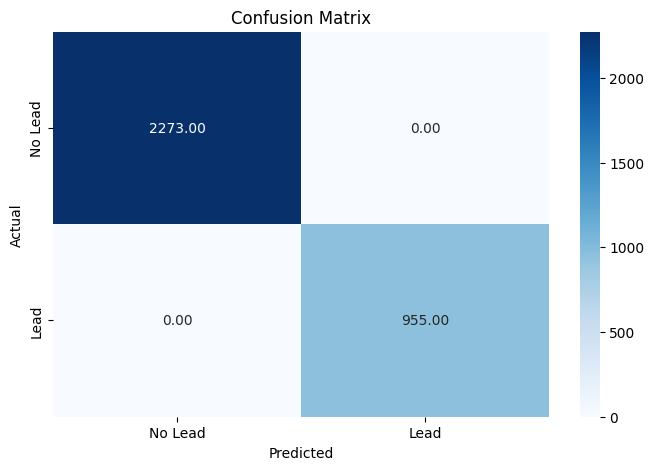

In [26]:
# Checking performance on the training data
y_pred_train1 = d_tree.predict(X_train) # make prediction on the training data

metrics_score(y_train, y_pred_train1) # We use the function created above to print the accuracy, recall score etc on the training data



We use the metrics_score function  defined earlier to evaluate the model on the test data. This will give  an initial sense of how well the model generalizes.

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       962
           1       0.67      0.67      0.67       422

    accuracy                           0.80      1384
   macro avg       0.76      0.76      0.76      1384
weighted avg       0.80      0.80      0.80      1384



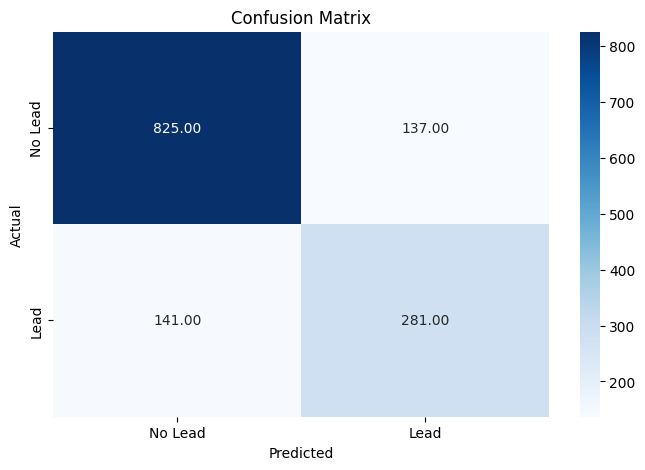

In [27]:
# Evaluate model performance on test data
y_pred_test = d_tree.predict(X_test)
metrics_score(y_test, y_pred_test)


Observation:



*  Precision: For class 0 (No Lead), the precision is 0.85, indicating that when the model predicts a customer will not become a paying lead, it is correct 85% of the time. For class 1 (Lead), the precision is 0.67, meaning the model is correct 67% of the time when predicting a customer will become a paying lead.

*  Recall: The recall for class 0 is 0.86, showing that the model successfully identifies 86% of all actual non-leads. For class 1, the recall is 0.67, indicating it identifies 67% of all actual leads.

*  F1-Score: The F1-score, which balances precision and recall, is 0.86 for class 0 and 0.67 for class 1. These scores suggest a relatively balanced performance between precision and recall for both classes, with better performance for class 0.

* Accuracy: The overall accuracy is 0.80, meaning the model correctly predicts the lead status for 80% of the customers in the test set.

* Interpretation: The model has a good balance between precision and recall for the majority class (No Lead), with scores around 0.85 and 0.86, respectively.
For the minority class (Lead), both precision and recall are 0.67, indicating room for improvement but showing that the model can still identify leads reasonably well.




In [28]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(d_tree, X, Y, cv=5, scoring='accuracy')  # Adjust scoring if needed

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Cross-validation scores: [0.81040087 0.80065005 0.81670282 0.80151844 0.79826464]
Mean cross-validation score: 0.805507364225399


Observation:


*  The cross-validation scores  obtained are consistent and show that your Decision Tree model has a stable performance with a mean accuracy of approximately 0.806 across different subsets of your data. This is a good indication that your model generalizes well and is not overly fitted to the training data.


              precision    recall  f1-score   support

           0       0.89      0.90      0.90       962
           1       0.77      0.74      0.75       422

    accuracy                           0.85      1384
   macro avg       0.83      0.82      0.82      1384
weighted avg       0.85      0.85      0.85      1384



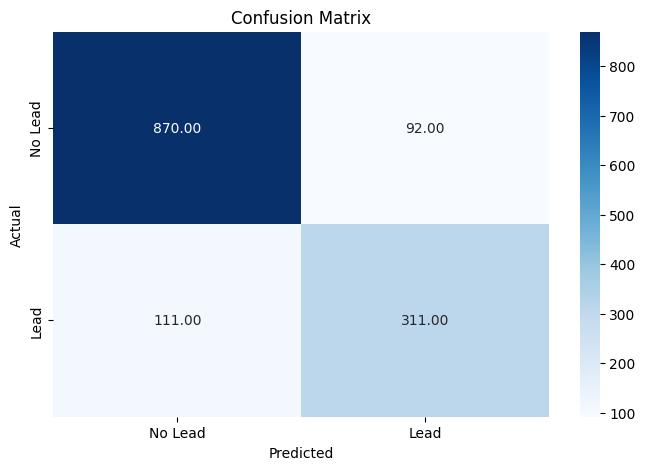

In [29]:
# Prune the tree by limiting its depth
d_tree_pruned = DecisionTreeClassifier(random_state=1, max_depth=5)  # Example: setting max_depth to 5
d_tree_pruned.fit(X_train, y_train)

# Evaluate the pruned model on test data
y_pred_test_pruned = d_tree_pruned.predict(X_test)
metrics_score(y_test, y_pred_test_pruned)


Observation:



*   Precision: The precision for class 0 (No Lead) has improved to 0.89, and for class 1 (Lead), it's now 0.77. This indicates a higher likelihood that the model's predictions are correct when it predicts each class.

*   Recall: The recall has also seen improvements, with class 0 at 0.90 and class 1 at 0.74. This means the model is better at identifying true positives for both classes than before.

*  F1-Score: The F1-scores, which balance precision and recall, are 0.90 for class 0 and 0.75 for class 1, showing good performance across both classes, especially for class 0.

*  Accuracy: The overall accuracy of the model has increased to 0.85, indicating that the model correctly predicts the lead status for 85% of the customers in the test set.

*   Pruning the tree has likely helped the model generalize better by preventing it from growing too complex and overfitting to the training data. This is a common and effective technique for improving model performance, especially with decision trees.
*   We will look into feature importance next to provide insights into what drives predictions and help in further feature engineering.


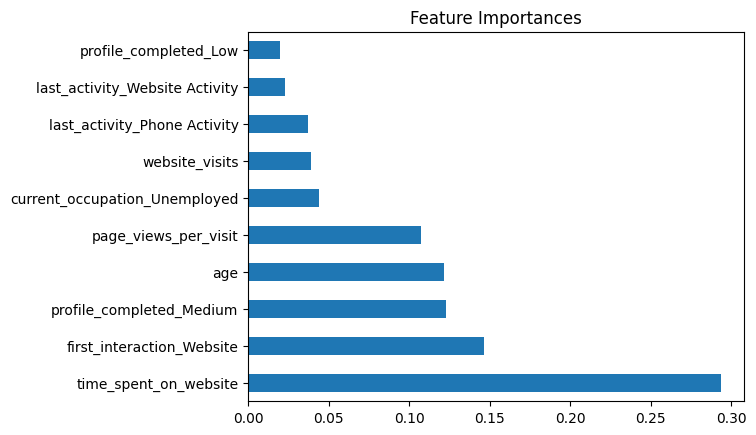

In [30]:
feature_importances = pd.Series(d_tree.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')  # Adjust the number to display as needed
plt.title('Feature Importances')
plt.show()


Observation:

*   Time on Website: A significant amount of time spent on the website may imply a higher level of customer engagement or interest, which could lead to a higher likelihood of conversion to a paying lead.

*  First Interaction and Profile Completion: The first interaction being through the website and the completion level of the user's profile (particularly medium level completion) also seem to be strong indicators. These factors might relate to the user's engagement and the quality of the data they've provided.

*  Age and Page Views: The age of the customer and the number of page views per visit are also important, but to a lesser extent. These might correlate with the customer's needs and their active exploration of the website.



## Building a Random Forest model

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       962
           1       0.79      0.69      0.74       422

    accuracy                           0.85      1384
   macro avg       0.83      0.80      0.81      1384
weighted avg       0.85      0.85      0.85      1384



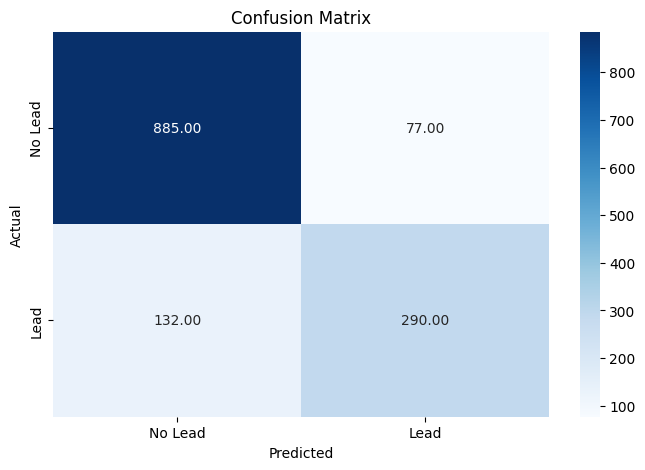

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Fit a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)

# Evaluate the Random Forest model on test data
y_pred_rf = rf.predict(X_test)
metrics_score(y_test, y_pred_rf)


Observation:

*   Class 0 (No Lead): The RandomForest has a slightly lower precision but higher recall compared to the pruned Decision Tree. This means it correctly identifies a greater proportion of actual non-leads, but also incorrectly labels a few more leads as non-leads.

*  Class 1 (Lead): The RandomForest has a higher precision but lower recall than the pruned Decision Tree. This suggests that while the predictions it makes for leads are more often correct, it misses a higher proportion of actual leads.

*  Accuracy: The overall accuracy remains at 0.85, indicating that the RandomForest model is correctly predicting the lead status for 85% of the customers in the test set, similar to the pruned Decision Tree.

*  Macro and Weighted Averages: The macro average, which treats both classes equally, is slightly lower for RandomForest, mainly due to the decrease in recall for class 1. The weighted average, which accounts for class imbalance, remains the same.

*  Interpretation: The RandomForest model's performance indicates that it is robust and doesn't overfit as much as an unpruned Decision Tree might. However, there is a trade-off between precision and recall for class 1 (Lead), which is a common challenge in classification tasks, especially with imbalanced datasets.

## Model Performance evaluation and improvement

We aim to get an even better model by tuning the random forest classifier.

We will tune the important hyperparameters of the Random Forest Classifier.

We will not tune the criterion hyperparameter as we know from hyperparameter tuning for decision trees that entropy is a better splitting criterion for this data.

In [32]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [100, 110, 120],
    "max_depth": [5, 6, 7],
    "max_features": [0.8, 0.9, 1]
             }

# Type of scoring used to compare parameter combinations - f1 score for class 1
scorer = metrics.make_scorer(f1_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [33]:
# Fitting the best algorithm to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features=0.9,
                       random_state=7)

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      2273
           1       0.84      0.78      0.81       955

    accuracy                           0.89      3228
   macro avg       0.88      0.86      0.87      3228
weighted avg       0.89      0.89      0.89      3228



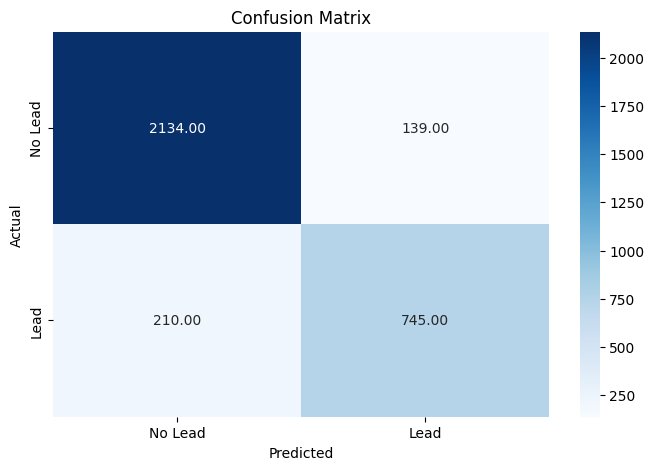

In [34]:
# Checking performance on the training data
y_pred_train4 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train4)

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       962
           1       0.82      0.72      0.76       422

    accuracy                           0.87      1384
   macro avg       0.85      0.82      0.84      1384
weighted avg       0.86      0.87      0.86      1384



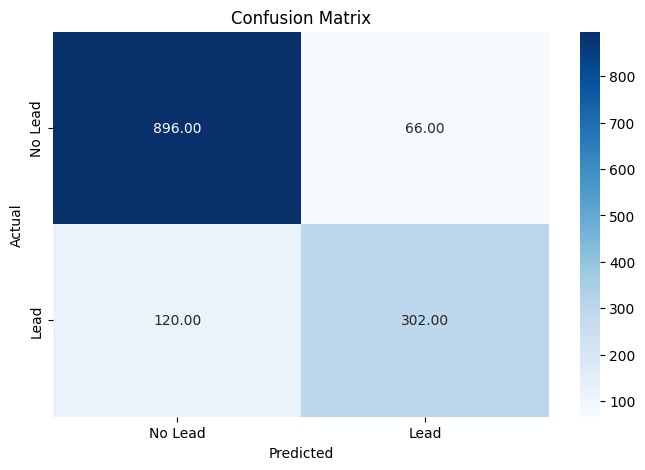

In [35]:
# Evaluate the tuned Random Forest model on test data
y_pred_tuned_rf = rf_estimator_tuned.predict(X_test)
metrics_score(y_test, y_pred_tuned_rf)


Observation:

*   Precision for class 1 (Lead) increased from 0.79 to 0.82, indicating that when the model predicts a customer will become a lead, it is now more likely to be correct.

*   Recall for class 1 improved from 0.69 to 0.72, meaning the model is now better at identifying actual leads.

*   F1-Score for class 1 also increased from 0.74 to 0.76, suggesting a better balance between precision and recall for predicting leads.

*  Accuracy went up slightly from 0.85 to 0.87, meaning the overall proportion of correct predictions has increased.

*  The macro avg F1-score increased, indicating better overall performance across both classes.

*  The weighted avg F1-score went up as well, which takes into account the class imbalance, suggesting improved performance while accounting for the different class sizes.

* These results suggest that your hyperparameter tuning was successful in improving the model's ability to predict both classes, particularly the minority class of interest, which is typically the more challenging aspect of an imbalanced classification problem.

* Interpretation: The model is doing a good job of correctly identifying leads (class 1) while maintaining a high level of overall accuracy. The improvement in recall is particularly encouraging because it means fewer actual leads are being missed by the model.

In [37]:
# Get the best parameters
best_parameters = grid_obj.best_params_
print(f"Best Parameters: {best_parameters}")


Best Parameters: {'max_depth': 7, 'max_features': 0.9, 'n_estimators': 100}


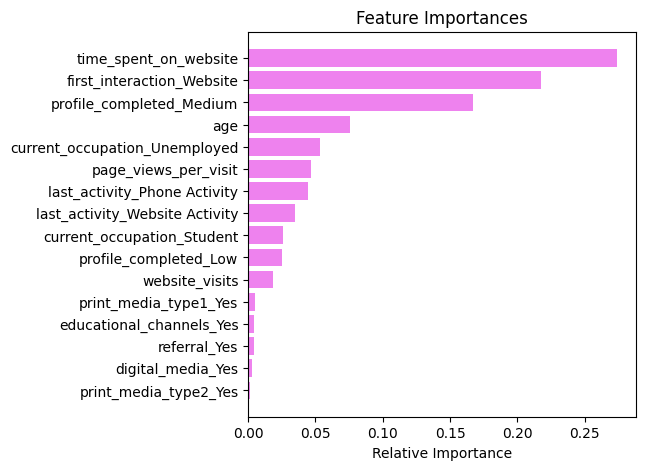

In [40]:
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (5, 5))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

Since class imbalance was a concern, we use the best parameters but with the class_weight='balanced' parameter to give more weight to the minority class. This can help improve recall for the minority class.

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       962
           1       0.74      0.80      0.77       422

    accuracy                           0.85      1384
   macro avg       0.82      0.84      0.83      1384
weighted avg       0.86      0.85      0.85      1384



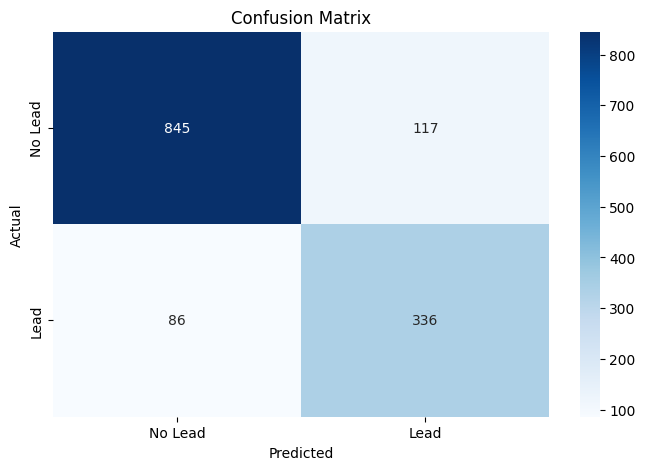

In [39]:
# Instantiate the RandomForestClassifier with the best parameters and class_weight set to 'balanced'
rf_balanced = RandomForestClassifier(
    n_estimators=100,
    max_depth=7,
    max_features=0.9,
    random_state=1,
    class_weight='balanced'  # Adjusting for class imbalance
)

# Fit the model on the training data
rf_balanced.fit(X_train, y_train)

# Predict on the test data
y_pred_balanced_rf = rf_balanced.predict(X_test)

# Define a function to print the classification report and confusion matrix
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8, 5))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=['No Lead', 'Lead'], yticklabels=['No Lead', 'Lead'], cmap='Blues')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

# Evaluate the model with the balanced class weights
metrics_score(y_test, y_pred_balanced_rf)



Observation:

The output of the RandomForestClassifier with class weights balanced indicates an improvement in the recall for class 1 (Lead) at the expense of a slight decrease in precision. Here's what the new metrics tell us:

* Precision for Class 1 has decreased slightly from 0.82 to 0.74, indicating that when the model predicts a customer will become a paying lead, it is correct 74% of the time, which is lower than before.

* Recall for Class 1 has improved from 0.72 to 0.80, meaning that the model is now identifying 80% of the actual leads, which is an improvement over the previous model.

* F1-Score for Class 1 is at 0.77, which is higher than the previous RandomForest model without balanced class weights. The F1-score combines precision and recall into a single metric that balances both concerns.

* Accuracy has not changed significantly and remains at 0.85, suggesting that the overall number of correct predictions across both classes remains about the same.

* Macro Avg shows that the average performance across both classes has improved in terms of recall, with a slight decrease in precision.

* Weighted Avg also indicates a balanced improvement considering the class distribution.


*  The decrease in precision for class 1 means that the model is more likely to falsely identify some non-leads as leads. However, the increase in recall for this class means that fewer actual leads are being missed. Given that the leads are contributing to the companie's profit, this is desirable

## Actionable Insights and Recommendations

Conclusion

Our analysis aimed to discern the likelihood of leads converting into paying customers for an EdTech company, identify the primary factors driving lead conversion, and develop a profile for leads with a high propensity to convert. Through rigorous data preprocessing, including addressing class imbalance and feature engineering, we established a robust predictive model using a RandomForestClassifier. The initial model demonstrated a good predictive capability, which was further refined through hyperparameter tuning with GridSearchCV and class weight adjustments to enhance recall for the minority class.


We observed that engagement metrics, particularly time spent on the website and the nature of the first interaction, were pivotal in predicting conversions. The insights suggest that leads with a medium level of profile completion were more likely to convert, implying a strong correlation between engagement depth and conversion probability.


Model Insights:

*   Our predictive model can identify potential paying customers with an accuracy of 85%, with particular sensitivity to not missing actual leads. This means we can effectively prioritize our engagement efforts to the leads most likely to convert.

*   The final model was able to achieve a F1 score of 0.89 for no leads and 0.77 for leads.  By adjusting the class weights to be 'balanced', our final model is  best at identifying the positive class (Lead). This is particularly useful if the business cost of missing a potential lead is higher than the cost of falsely identifying a non-lead as a lead. In other words, the model now prioritizes capturing as many actual leads as possible.

Key Drivers:
*  Analysis of the factors influencing lead conversion has revealed that engagement metrics, such as time spent on the website and interactions with digital content, are significant predictors of conversion. This underscores the value of our online content and user experience in the lead conversion process.

Lead Profile:
*  Based on our model, a typical profile of leads who are likely to convert includes those who spend more time on the website, have meaningful interactions from the outset, and show a certain level of engagement as indicated by profile completion. This profile can guide our marketing strategies to target similar leads more effectively.



Recommendation

*  Enhance Online Engagement: Prioritize the development of engaging online content and interactive tools that encourage prospective leads to spend more time on the website. The longer a lead engages with the website, the higher the likelihood of conversion.

*  Optimize First Interaction: Tailor the user experience for first-time website visitors. Personalized greetings, introductory offers, or guided tours of services could create a lasting positive impression, crucial for conversion.

*  Improve Profile Completion: Encourage users to complete their profiles by simplifying the process and incentivizing them with relevant benefits. Medium-level profile completion has been associated with higher conversion rates, so facilitating this step could be beneficial.

*  Targeted Follow-Up: Implement targeted follow-up strategies for leads showing high engagement metrics. Utilize the model's insights to personalize communication and offers to these potential customers.

* Leverage Data for Personalization: Use the collected data to personalize the learning experience for leads. For example, suggest courses or materials that align with their interaction history or profile information.

*  Refine Marketing Strategies: Reassess marketing strategies for different segments, especially those less likely to convert. Align marketing efforts with the profiles of leads that are more likely to convert, as identified by the model.

*  Continual Model Refinement: Regularly update the predictive model with new data and continue to refine it to adapt to changing customer behaviors and market trends.